## import the required packages

In [7]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Reading the data from csv

In [8]:
NYC_data= pd.read_csv('D:/PrograminD/311_Service_Requests_from_2010_to_Present.csv')


C:\Users\yvadde\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#Checking the data info

NYC_data.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [10]:
# Looking at the structure of the file
NYC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

In [13]:
#checking for total null values
# axis = 0 for column wise analysis
print(NYC_data.isnull().sum(axis = 0))

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [14]:
# See how many variables in an observation have null values
print(NYC_data.isnull().sum(axis = 1))

0         14
1         14
2         14
3         14
4         14
5         14
6         14
7         14
8         14
9         14
10        14
11        14
12        14
13        14
14        14
15        14
16        14
17        14
18        14
19        14
20        14
21        14
22        14
23        14
24        14
25        14
26        14
27        14
28        14
29        14
          ..
300668    14
300669    16
300670    14
300671    14
300672    14
300673    14
300674    14
300675    14
300676    14
300677    14
300678    14
300679    14
300680    14
300681    14
300682    14
300683    14
300684    14
300685    14
300686    14
300687    14
300688    14
300689    14
300690    16
300691    14
300692    14
300693    25
300694    14
300695    14
300696    14
300697    14
Length: 300698, dtype: int64


In [15]:
#get the column names of NYC data
NYC_data.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot 

In [23]:
# Getting the descriptive statistics of the numerical attributes of the dataset
NYC_data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude,Request_Closing
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000,298534
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630,0 days 04:18:51.832782
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454,0 days 06:05:22.141833
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937,0 days 00:01:00
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142,0 days 01:16:33
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781,0 days 02:42:55.500000
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805,0 days 05:21:00
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760,24 days 16:52:22


In [17]:
#Converting the date columns to datetime type
NYC_data['Created Date']= pd.to_datetime(NYC_data['Created Date'])
NYC_data['Closed Date']= pd.to_datetime(NYC_data['Closed Date'])

In [24]:
# Calculating the time taken to close the request
NYC_data['Request_Closing']= NYC_data['Closed Date']-NYC_data['Created Date']

In [19]:
# importing packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 

In [20]:
# To see the distribution of the complaint types
NYC_data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [19]:
NYC_data['Complaint Type'].value_counts()[:10]

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

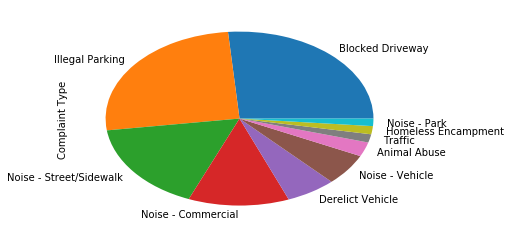

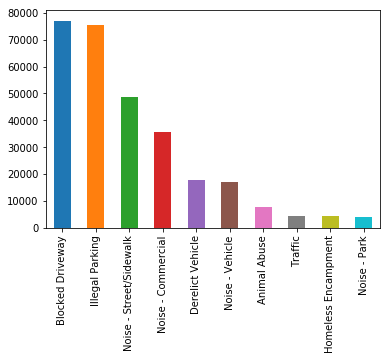

In [21]:
#Creating a pie chart for top 10 complaint types
NYC_data['Complaint Type'].value_counts().head(10).plot(kind='pie')
plt.show()
NYC_data['Complaint Type'].value_counts().head(10).plot(kind='bar')
plt.show()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64


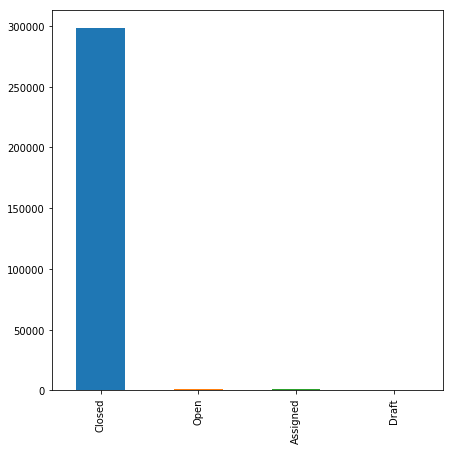

In [22]:
# Count of different status of the requests
print(NYC_data['Status'].value_counts())

#Bar chart for count of different status

NYC_data['Status'].value_counts().plot(kind='bar',figsize=(7,7))

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Ferry                              1
Terminal                           1
Park                               1
Name: Location Type, dtype: int64


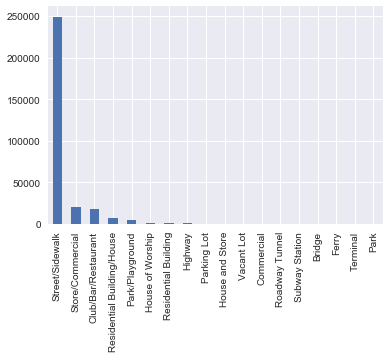

In [28]:
# Complaints by Location
print(NYC_data['Location Type'].value_counts())
NYC_data['Location Type'].value_counts().plot(kind='bar')
plt.show()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Name: Location Type, dtype: int64


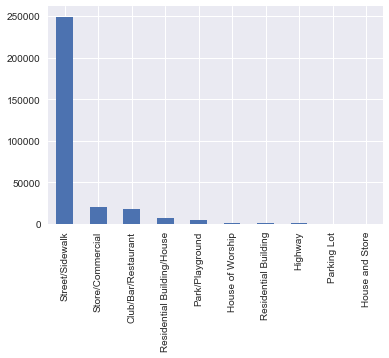

In [31]:
# Top 10 complaint location
print(NYC_data['Location Type'].value_counts().head(10))
NYC_data['Location Type'].value_counts().head(10).plot(kind='bar')

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

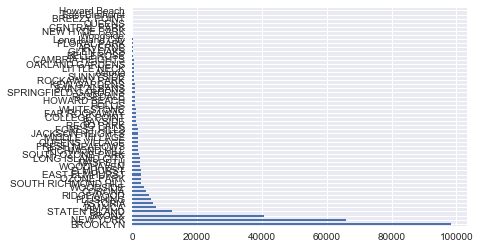

In [34]:
#Complaint count by cities
print(NYC_data['City'].value_counts())


BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           6330
FLUSHING          5971
RIDGEWOOD         5163
CORONA            4295
WOODSIDE          3544
Name: City, dtype: int64


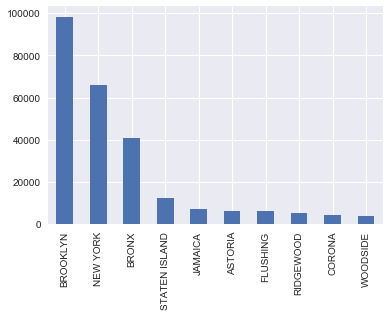

In [36]:
#Top 10 Cities having maximum number of complaints
print(NYC_data['City'].value_counts().head(10))
NYC_data['City'].value_counts().head(10).plot(kind='bar')
plt.show()

In [87]:
#Extracting the Days hours mins sec values from the Time ineterval column (Request_Closing) 
NYC_data['Days']=NYC_data['Request_Closing'].dt.days
NYC_data['hours']=NYC_data['Request_Closing'].dt.components.hours
NYC_data['mins']=NYC_data['Request_Closing'].dt.components.minutes
NYC_data['sec']=NYC_data['Request_Closing'].dt.components.seconds

# Calculating total values in seconds

NYC_data['Time_intvl_sec']= (NYC_data['Days']*(24*60*60))+ (NYC_data['hours']*(60*60))+(NYC_data['mins']*60)+NYC_data['sec']

In [91]:

pd.to_timedelta(NYC_data['Time_intvl_sec']*1000000000).head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Time_intvl_sec, dtype: timedelta64[ns]

## # Creating a dataframe for average closing time grouped by Location Type & Complaint Type

In [97]:
Summary= pd.DataFrame(NYC_data.groupby(['Location Type', 'Complaint Type'])['Time_intvl_sec'].mean())
# Converting the float value to timedelta type
Summary['Time_intvl_sec']=pd.to_timedelta(Summary['Time_intvl_sec']*1000000000)
# print the 5 records of Summary table
print(Summary.head())

                                         Time_intvl_sec
Location Type       Complaint Type                     
Bridge              Homeless Encampment 03:49:09.500000
Club/Bar/Restaurant Drinking            04:32:44.923287
                    Noise - Commercial  03:03:50.116976
                    Urinating in Public        07:55:12
Commercial          Animal Abuse        05:20:33.967741


In [98]:
# Representing the summary dataframe in cross tab format 
Summary.unstack()

Time_intvl_sec                   \
Complaint Type                Animal Abuse Animal in a Park   
Location Type                                                 
Bridge                                 NaT              NaT   
Club/Bar/Restaurant                    NaT              NaT   
Commercial                 05:20:33.967741              NaT   
Ferry                                  NaT              NaT   
Highway                                NaT              NaT   
House and Store            05:00:47.741935              NaT   
House of Worship                       NaT              NaT   
Park                                   NaT 14 days 00:50:05   
Park/Playground            03:42:08.975409              NaT   
Parking Lot                05:32:25.436363              NaT   
Residential Building       04:49:05.396475              NaT   
Residential Building/House 05:23:58.263924              NaT   
Roadway Tunnel                         NaT              NaT   
Store/Commercial           04:16:22.109404              NaT   
Street/Sidewalk            05:06:38.977734              NaT   
Subway Station             03:02:08.181818              NaT   
Terminal                               NaT              NaT   
Vacant Lot                             NaT              NaT   

                                                                       \
Complaint Type             Bike/Roller/Skate Chronic Blocked Driveway   
Location Type                                                           
Bridge                                           NaT              NaT   
Club/Bar/Restaurant                              NaT              NaT   
Commercial                                       NaT              NaT   
Ferry                                            NaT              NaT   
Highway                                          NaT              NaT   
House and Store                                  NaT              NaT   
House of Worship                                 NaT              NaT   
Park                                             NaT              NaT   
Park/Playground                                  NaT              NaT   
Parking Lot                                      NaT              NaT   
Residential Building                             NaT              NaT   
Residential Building/House           03:36:40.680000              NaT   
Roadway Tunnel                                   NaT              NaT   
Store/Commercial                            03:50:24              NaT   
Street/Sidewalk                      03:45:59.072254  04:44:27.674677   
Subway Station                                   NaT              NaT   
Terminal                                         NaT              NaT   
Vacant Lot                                       NaT              NaT   

                                                                              \
Complaint Type             Derelict Vehicle Disorderly Youth        Drinking   
Location Type                                                                  
Bridge                                  NaT              NaT             NaT   
Club/Bar/Restaurant                     NaT              NaT 04:32:44.923287   
Commercial                              NaT              NaT             NaT   
Ferry                                   NaT              NaT             NaT   
Highway                     08:11:44.538461              NaT             NaT   
House and Store                         NaT              NaT             NaT   
House of Worship                        NaT              NaT             NaT   
Park                                    NaT              NaT             NaT   
Park/Playground                         NaT              NaT 03:26:28.785714   
Parking Lot                             NaT              NaT             NaT   
Residential Building                    NaT              NaT             NaT   
Residential Building/House              NaT  03:51

# Statistical test to check the average response time across complaint types is similar or not (overall)

In [100]:
Complaint_Type= pd.DataFrame(NYC_data.groupby(['Complaint Type'])['Time_intvl_sec'].mean())
Complaint_Type.head()


,Time_intvl_sec
Complaint Type,
Agency Issues,1.893717e+04
Animal Abuse,1.876768e+04
Animal in a Park,1.212605e+06
Bike/Roller/Skate Chronic,1.355926e+04
Blocked Driveway,1.706726e+04


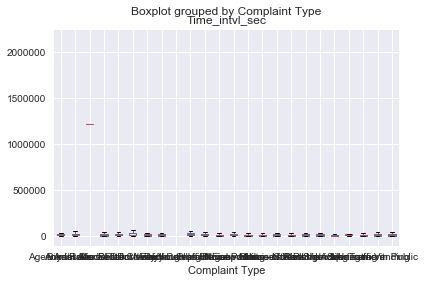

In [102]:
NYC_data.boxplot('Time_intvl_sec' , by= 'Complaint Type')

In [27]:
#city_comp=np.groupby(['city','Complaint Type']).size()